## Making figure A6
Start by importing modules, data and defining priors.

In [1]:
import arviz as az
import jax.numpy as jnp
import matplotlib.pylab as plt
import numpyro.distributions as dist
import numpy.random as rand

from makeCorner import *

In [2]:
cdf_file = "../data/RUNS/all_varied.cdf"
data = az.from_netcdf(cdf_file)
samps = data.posterior.stack(draws=("chain", "draw"))

In [3]:
def sigmoid_no_delta(low, high, width, middle, zs):
    return (high - low) / (1 + jnp.exp(-(1/width)*(zs - middle))) + low

zs = np.linspace(0,1,500)

### Making the figure

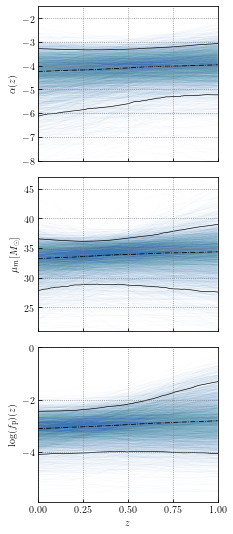

In [4]:
cm = 1/2.54
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8.5*cm, 3*6.375*cm))

ax1.set_rasterization_zorder(2)
kappa_matrix = np.zeros((len(range(samps.alpha_ref.size)), len(zs)))
for i in range(samps.alpha_ref.size):
    kappa_r = sigmoid_no_delta(samps.alpha_ref.values[i],
                               samps.high_alpha.values[i],
                               10.**samps.log_width_alpha.values[i],
                               samps.middle_z_alpha.values[i],
                               zs,
                              )
    ax1.plot(zs, kappa_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    kappa_matrix[i, :] = kappa_r

median_kappa = np.median(kappa_matrix, axis = 0)
ax1.set_ylim(-8, -1.5)
ax1.set_ylabel(r"$\alpha(z)$", fontsize = 10)
ax1.tick_params(axis='y', labelsize=10)
ax1.plot(zs, median_kappa, "-.", c="k", zorder = 1, lw = 0.8)
ax1.plot(zs,np.quantile(kappa_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax1.plot(zs,np.quantile(kappa_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)

ax2.set_rasterization_zorder(2)
mu_matrix = np.zeros((len(range(samps.alpha_ref.size)), len(zs)))
for i in range(samps.alpha_ref.size):
    mu_r = sigmoid_no_delta(samps.mu_m1.values[i],
                               samps.high_mu.values[i],
                               10.**samps.log_width_mu.values[i],
                               samps.middle_z_mu.values[i],
                               zs,
                              )
    ax2.plot(zs, mu_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    mu_matrix[i, :] = mu_r

median_mu = np.median(mu_matrix, axis = 0)
ax2.set_ylim(21, 47)
ax2.set_ylabel(r"$\mu_m [M_\odot]$", fontsize = 10)
ax2.tick_params(axis='y', labelsize=10)
ax2.plot(zs, median_mu, "-.", c="k", zorder = 1, lw = 0.8)
ax2.plot(zs,np.quantile(mu_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax2.plot(zs,np.quantile(mu_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)


ax3.set_rasterization_zorder(2)
fpeak_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
for i in range(samps.log_f_peak.size):
    f_peak_r = sigmoid_no_delta(samps.log_f_peak.values[i],
                               samps.log_high_f_peak.values[i],
                               10.**samps.log_width_f_peak.values[i],
                               samps.middle_z_f_peak.values[i],
                               zs,
                              )
    ax3.plot(zs, f_peak_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    fpeak_matrix[i, :] = f_peak_r

median_fpeak = np.median(fpeak_matrix, axis = 0)
ax3.set_xlim(0,1)
ax3.set_ylim(-5.9, 0)
ax3.set_xlabel(r"$z$", fontsize = 10)
ax3.set_ylabel(r"$\log(f_{\rm p})(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax3.plot(zs, median_fpeak, "-.", c="k", zorder = 1, lw = 0.8)
ax3.plot(zs,np.quantile(fpeak_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax3.plot(zs,np.quantile(fpeak_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)


plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

# Adjust layout
plt.tight_layout()
plt.savefig("All_varied_trace_one_plot.pdf", dpi=500, bbox_inches="tight")
plt.show()